 1.DETERMINATION DE LA BANDE INTERDITE


La bande interdite est définie comme la différence d'énergie entre le minimum de la bande de conduction(le point rouge) et le maximum de la bande de valence (le point vert). Si il n'y a pas de bande interdite, notre matériaux est considéré comme un métal.
 La bande interdite est dit indirecte car le minimum de la bande de conduction ne se situe pas sur le même vecteur d'onde que le maximum de la bande de valence. Ce qui signigie qu'il faut plus d'énergie pour passer de la bande de valence à la bande de conduction si on ne considère que des intéractions avec des photons. La transition se fait de (0.150,-0.000,0.000)-L où (0.150,-0.000,0.000) est la direction d'un vecteur d'onde. 
La bande interdite à une valeur de 1.5591 eV. Cette énergie étant faible, notre matériaux est donc un semi conducteur.
Remarque : il y a  2 points rouges car il y a 2 fois la direction L comme point critique.


Diagramme de la structure de bande du SnS2:
----------------

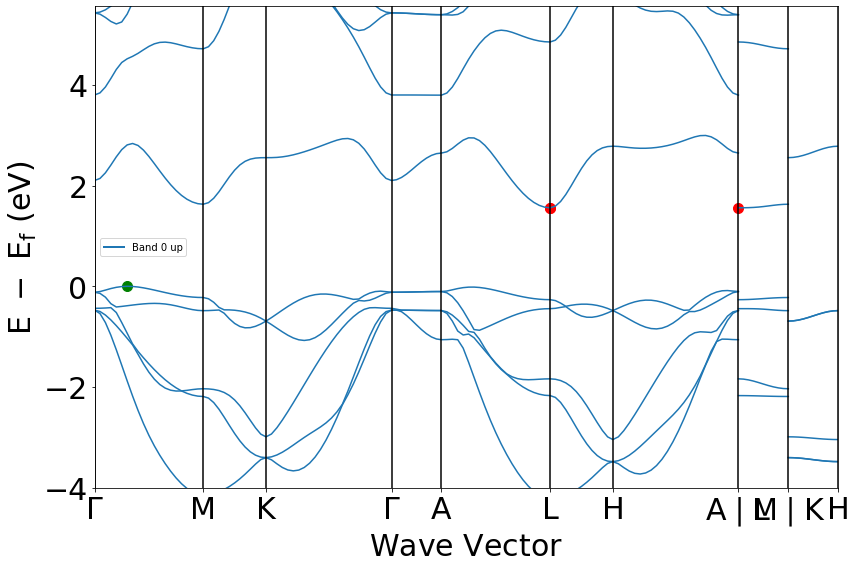

In [29]:
import matplotlib.pyplot as plt
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.electronic_structure.bandstructure import BandStructure
import numpy as np
with MPRester("z18b57ZwfPDtXJVD") as m: 
    bdstr = m.get_bandstructure_by_material_id("mp-1170")

#Détermination de la bande interdite
bdgp = bdstr.get_band_gap() #recherche les informations concernant la  bande interdite
bplot=plotter.BSPlotter(bdstr).get_plot(vbm_cbm_marker=True) #affiche les maxima et minima sur le diagramme de bande

print(" 1.DETERMINATION DE LA BANDE INTERDITE")
print('\n')
print("La bande interdite est définie comme la différence d'énergie entre le minimum de la bande de conduction(le point rouge) et le maximum de la bande de valence (le point vert). Si il n'y a pas de bande interdite, notre matériaux est considéré comme un métal.")
print(" La bande interdite est dit indirecte car le minimum de la bande de conduction ne se situe pas sur le même vecteur d'onde que le maximum de la bande de valence. Ce qui signigie qu'il faut plus d'énergie pour passer de la bande de valence à la bande de conduction si on ne considère que des intéractions avec des photons. La transition se fait de", bdgp.get('transition'), "où (0.150,-0.000,0.000) est la direction d'un vecteur d'onde. \nLa bande interdite à une valeur de", bdgp['energy'],"eV. Cette énergie étant faible, notre matériaux est donc un semi conducteur.")
print("Remarque : il y a  2 points rouges car il y a 2 fois la direction L comme point critique.")
print('\n')
print("Diagramme de la structure de bande du SnS2:")
print("-------------------------------------")
bplot.show()


 2. DISPERSION


 La direction avec la plus forte dispersion est la direction qui observe la plus forte pente sur le diagramme des bandes. A l'inverse, la direction avec la dispersion la plus faible est celle avec la pente la plus faible. La dispersion d'une particule (ici un électron) par rapport à k nous donne des indications sur la densité d'état, la masse effective et donc la mobilité de cette particule. En effet, si la dispersion est faible, la densité d'état va être élevée. La masse effective de l'électron va alors augmenter et diminuer sa mobolité.


La pente la plus forte sur la dernière bande de valence est  0.8274669188198387 . Ce qui correspond aux directions M-K (flèche rouge sur le graphe). 


La pente la plus faible sur la dernière bande de valence est  0.03042980069066667 . Ce qui correspond aux directions Γ-A (flèche bleu sur le graphe). 


La pente la plus forte sur la dernière bande de conduction est  2.1614128419642857 . Ce qui correspond à la direction L-H (flèche v

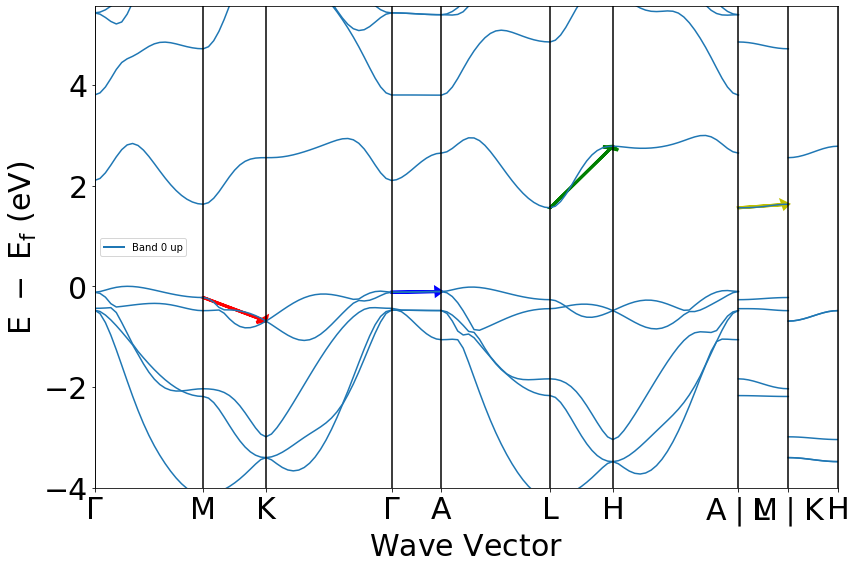

In [110]:
bandplot = BSPlotter(bdstr)
data = bandplot.bs_plot_data()
en = data.get('energy')
vbm = bdstr.get_vbm()
cbm = bdstr.get_cbm()
bande_val_ind = list(vbm['band_index'].values())[0]
bande_cond_ind = list(cbm['band_index'].values())[0]
D = data.get('ticks').get('distance')

dist = np.array([D[1]-D[0] , D[3]-D[2] , D[5]-D[4] , D[7]-D[6] , D[9]-D[8] , D[11]-D[10], D[13]-D[12], D[14]-D[13], D[15]-D[14] ])
#Attention car certains vecteurs d'onde sont à la même distance de l'origine donc la distance entre 2 de ses vecteurs est nul.  Ce qui pose problème pour calculer la pente
for i in range(0,9):
    pente_Val[i] =abs((en.get('1')[i][bande_val_ind[0]][-1] - en.get('1')[i][bande_val_ind[0]][0])/dist[i]) #calcule des pentes en valeur absolue
    pente_Con[i] =abs((en.get('1')[i][bande_cond_ind[0]][-1] - en.get('1')[i][bande_cond_ind[0]][0])/dist[i])
    
maxVal = np.amax(pente_Val) 
minVal = np.amin(pente_Val) 


maxCon = np.amax(pente_Con) 
minCon = np.amin(pente_Con) 


bandplot.get_plot()
#max dispersion valence
plt.arrow(D[1], (en.get('1')[1][bande_val_ind[0]])[0], dist[1], en.get('1')[1][bande_val_ind[0]][-1] - en.get('1')[1][bande_val_ind[0]][0], color = 'r', head_width=0.15, head_length=0.05, linewidth=3,length_includes_head=True)
#min dipersion valence
plt.arrow(D[5], (en.get('1')[3][bande_val_ind[0]])[0], dist[3], en.get('1')[3][bande_val_ind[0]][-1] - en.get('1')[3][bande_val_ind[0]][0], color = 'b', head_width=0.15, head_length=0.05, linewidth=3,length_includes_head=True)
#max dispersion conduction
plt.arrow(D[9], (en.get('1')[5][bande_cond_ind[0]])[0], dist[5], en.get('1')[5][bande_cond_ind[0]][-1] - en.get('1')[5][bande_cond_ind[0]][0], color = 'g', head_width=0.15, head_length=0.05, linewidth=3,length_includes_head=True)
#max dispersion conduction
plt.arrow(D[13], (en.get('1')[7][bande_cond_ind[0]])[0], dist[7], en.get('1')[7][bande_cond_ind[0]][-1] - en.get('1')[7][bande_cond_ind[0]][0], color = 'y', head_width=0.15, head_length=0.05, linewidth=3,length_includes_head=True)


print(" 2. DISPERSION")
print('\n')
print(" La direction avec la plus forte dispersion est la direction qui observe la plus forte pente sur le diagramme des bandes. A l'inverse, la direction avec la dispersion la plus faible est celle avec la pente la plus faible. La dispersion d'une particule (ici un électron) par rapport à k nous donne des indications sur la densité d'état, la masse effective et donc la mobilité de cette particule. En effet, si la dispersion est faible, la densité d'état va être élevée. La masse effective de l'électron va alors augmenter et diminuer sa mobolité.")
print('\n')
print("La pente la plus forte sur la dernière bande de valence est " , maxVal , ". Ce qui correspond aux directions M-K (flèche rouge sur le graphe). ")
print('\n')
print("La pente la plus faible sur la dernière bande de valence est " , minVal , ". Ce qui correspond aux directions Γ-A (flèche bleu sur le graphe). ")
print('\n')
print("La pente la plus forte sur la dernière bande de conduction est " , maxCon , ". Ce qui correspond à la direction L-H (flèche verte sur le graphe). ")
print('\n')
print("La pente la plus faible sur la dernière bande de conduction est " , minCon , ". Ce qui correspond aux directions L-M, L-K, A-M et A-K (flèche jaune sur le graphe). ")
print('\n')
print(" ")

Commençons par préciser que l'énergie est une fonction de la fonction d'onde et nous l'approximons par une trajectoire parabolique telle que E(k) = ak² + bk + c.
En démarant ensuite de l'équation bien connue de la physique quantique E =  (h²k²)/(8π²m), on peut facilement isolé la masse 'm'. Si on dérive 2x l'expression, on trouve que m = dk²*h²/4π²*d²E. Mais connaissant l'expressions de E(k), on déduit que m = h²/8aπ² où 'a' est le coefficient quadratique de E(k).
Avec une extrapolation sur 3 points, on trouve facilement le coefficient a. La valeur de ce coefficieent varie lorsqu'on se déplace sur les bandes et entre les différentes bandes. C'est pourquoi la valeur de la masse elle aussi varie en fonction de la bande où l'on prend la mesure.
Dans le cas du point situé au maximum de la bande de valence, la dérivée seconde de l'énergie vaut donc  -3.620140691619692  eV.Ansgtröm ². Ce qui équivaut à  -5.7994653879747464e-39  J/m
La masse effective de l'électron devient alors -1.9155489785

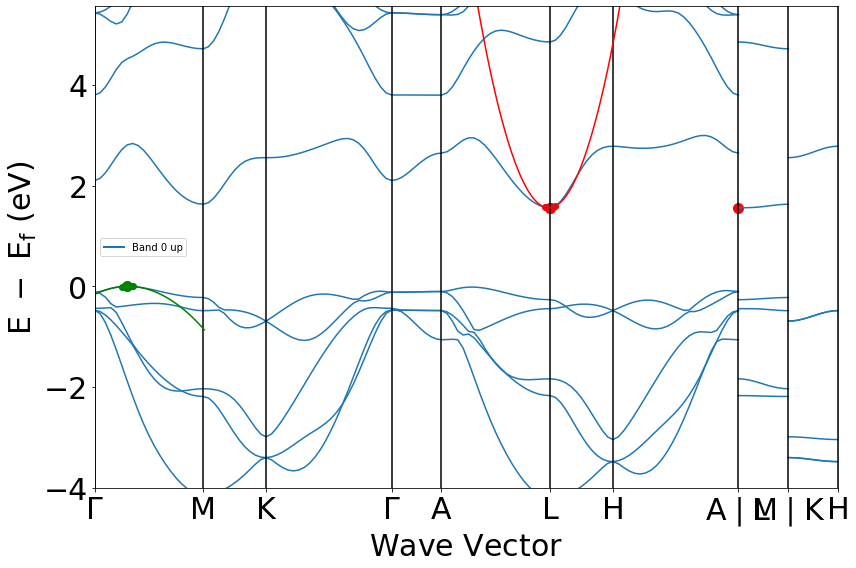

In [188]:
#BANDE DE  VALENCE

Xv = [data.get('distances')[0][5],data.get('distances')[0][6],data.get('distances')[0][7]]
Yv = [en.get('1')[0][bande_val_ind[0]][5], en.get('1')[0][bande_val_ind[0]][6], en.get('1')[0][bande_val_ind[0]][7]]

#Approximation de coefficient de E(k) pour la bande de valence
av = np.polyfit(Xv,Yv,2)[0]
bv = np.polyfit(Xv,Yv,2)[1]
cv = np.polyfit(Xv,Yv,2)[2]

var_kv = np.arange(0,1,0.01)
E_v = av*var_kv**2 + bv*var_kv + cv

av_SI = 2*av*(1.602*10**(-19))*(10**(-10))**2 #transformation du coefficient 'a' des unités atomiques vers les unité du SI

hbar = 1.054*10**(-34) # constante de PLanck réduite en [J/s]
m_elec = 9.109E-31 #masse d'un electron [kg]

mv_eff_elc = (hbar**2)/av_SI
coefv = mv_eff_elc / m_elec




#BANDE DE CONDUCTION

Xc = [ data.get('distances')[4][-2],data.get('distances')[4][-1],data.get('distances')[5][1]]
Yc = [ en.get('1')[4][bande_cond_ind[0]][-2], en.get('1')[4][bande_cond_ind[0]][-1], en.get('1')[5][bande_cond_ind[0]][1]]

ac = np.polyfit(Xc,Yc,2)[0]
bc = np.polyfit(Xc,Yc,2)[1]
cc = np.polyfit(Xc,Yc,2)[2]

var_kc = np.arange(3,5,0.01)
E_c = ac*var_kc**2 + bc*var_kc + cc

ac_SI = 2*ac*(1.602*10**(-19))*(10**(-10))**2

coefc = mc_eff_elc / m_elec
mc_eff_elc = (hbar**2)/ac_SI


print("Commençons par préciser que l'énergie est une fonction de la fonction d'onde et nous l'approximons par une trajectoire parabolique telle que E(k) = ak² + bk + c.")
print("En démarant ensuite de l'équation bien connue de la physique quantique E =  (h²k²)/(8π²m), on peut facilement isolé la masse 'm'. Si on dérive 2x l'expression, on trouve que m = dk²*h²/4π²*d²E. Mais connaissant l'expressions de E(k), on déduit que m = h²/8aπ² où 'a' est le coefficient quadratique de E(k).")
print("Avec une extrapolation sur 3 points, on trouve facilement le coefficient a. La valeur de ce coefficieent varie lorsqu'on se déplace sur les bandes et entre les différentes bandes. C'est pourquoi la valeur de la masse elle aussi varie en fonction de la bande où l'on prend la mesure.")
print("Dans le cas du point situé au maximum de la bande de valence, la dérivée seconde de l'énergie vaut donc " , 2*av ," eV.Ansgtröm ². Ce qui équivaut à ",av_SI," J/m" )
print("La masse effective de l'électron devient alors", mv_eff_elc,"kg. Ceci correspond à", coefv, "fois la masse d'un électron libre. La masse négative peut surprendre mais elle représente la masse d'un trou. Etant 'plus lourd', les électrons perdent donc en mobilité")



print("Dans le cas du point situé au minimum de la bande de conduction, la dérivée seconde de l'énergie vaut donc " , 2*ac ," eV.Ansgtröm ². Ce qui équivaut à ",ac_SI," J/m." )
print("La masse effective de l'électron devient alors", mc_eff_elc,"kg. Ceci correspond à", coefc, "fois la masse d'un électron libre. Etant 'plus léger', l'électron a gangé en mobilité")


print("La dérivée seconde de l'énergie vaut donc " , 2*ac ," eV.Ansgtröm ². Ce qui équivaut à ",ac_SI," J/m" )


bplot=plotter.BSPlotter(bdstr).get_plot(vbm_cbm_marker=True)
plt.plot(var_kv, E_v,color ='g')
plt.scatter(Xv,Yv, color = 'g')
plt.plot(var_kc, E_c,color ='r')
plt.scatter(Xc,Yc, color = 'r')
bplot.show()